# Livestock - Exploration and Data Cleaning
In this notebook we explore the dataset we got from FAO, and try to retrieve the most important information from.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
livestock = pd.read_csv('raw_data/Production_LivestockPrimary_E_All_Data.csv', sep = ',', encoding = 'latin-1')
livestock.head(3)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F
0,2,Afghanistan,1062,"Eggs, hen, in shell",5313,Laying,1000 Head,4000.0,F,4400.0,...,9500.0,F,9500.0,F,9337.0,Im,9369.0,Im,10688.0,F
1,2,Afghanistan,1062,"Eggs, hen, in shell",5410,Yield,100mg/An,25000.0,Fc,25000.0,...,18947.0,Fc,19474.0,Fc,21253.0,Fc,21263.0,Fc,18713.0,Fc
2,2,Afghanistan,1062,"Eggs, hen, in shell",5510,Production,tonnes,10000.0,F,11000.0,...,18000.0,F,18500.0,F,19844.0,Im,19921.0,Im,20000.0,F


## Explanations of data files
Each row of the livestock dataset contains data on all years available, on a given metadata.  
There are 7 columns of metadata, which can be seen below, and the rest of the columns are data for each year.  
The years usually span from 1961 to 2017, but some years are missing.  

| Column name         | Explanation|
|------------------------|--------|
| Area                   |Name of country/area|
| Area Code              |Unique code for each country/area|
| Item                   |Type of product, e.g "Eggs, hen, in shell"|
| Item Code              |Unique code for each Item|
| Element                |Type data, e.g. Production, Yield, Milk Animals |
| Unit                   |The unit of the measurement of the element, in total 9 different units |
| Element Code           |Unique code based on pairs of Element and Unit|


For each year there is also a column with the year + F, which signifies the meaning of the data.  

|  Flag  | Meaning of flag        |
|--------|------------------------|
| *      | Unofficial data        |
| F      | FAO Estimate           |
| NaN    | Official data          |
| Fc     | Calculated data        |
| A      | Aggregate, may include official, semi-official, estimated or calculated data |
| M      | Data not available     | 
| Im     |FAO data based on imputation methodology |



### Elements
|  Element             | Description            |
|----------------------|------------------------|
| Laying               | Birds raised for laying eggs        |
| Yield                | How much of the animal which is used           |
| Production           | How much is produced          |
| Producing Animals/Slaughtered    | How many animals that are being produced for meat        |
| Yield/Carcass Weight | Same as yield, but also taking account size of animal |
| Milk Animals         | How many animals used for milk production     | 
| Prod Popultn         | Population of a given item  |


### Units

The units can be quite confusing, but as we remove them many of them we do not have to use so much time on this. However, here is a quick summary of them.

Producing Animals/Slaughtered: 
- Laying in 1000 heads; 
- Milk Animals in heads; 
- Prod Population (Beehives) in number; 
- Prod Population (Slaughtered animals) in heads. 

Production Quantity: 

- Eggs in tonnes and in number; 
- Meat and milk in tonnes; 
- Wool and Hides and Skins in tonnes; 
- Honey and Beeswax in tonnes.

Yield: 

- 100 milligrams per animal; 
- number per animal; hectograms per animal; 
- hectograms.  

Yield/Carcass Weight:

- 0.1 grams per animal (poultry);
- hectograms per animal (other animals).


## Data Cleaning

**Elements**  
As we are primarily interested in meat production in this task, we take away all elements except _Production_ and _Producing Animals/Slaughtered_. 

In [13]:
livestock_prod = livestock[(livestock['Element'] == 'Production') | (livestock['Element'] == 'Producing Animals /Slaughtered') ]
livestock_prod.head(3)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F
2,2,Afghanistan,1062,"Eggs, hen, in shell",5510,Production,tonnes,10000.0,F,11000.0,...,18000.0,F,18500.0,F,19844.0,Im,19921.0,Im,20000.0,F
3,2,Afghanistan,1067,"Eggs, hen, in shell (number)",5513,Production,1000 No,200000.0,F,220000.0,...,360000.0,F,370000.0,F,396880.0,Im,398420.0,Im,400000.0,F
6,2,Afghanistan,919,"Hides, cattle, fresh",5510,Production,tonnes,7200.0,Fc,7680.0,...,14890.0,Fc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Items**  
After removing the other elements, we remove all items that are not meat.

In [14]:
livestock_meat = livestock_prod[livestock_prod['Item'].str.contains('Meat')]
livestock_meat.head(5)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F
8,2,Afghanistan,1137,"Meat indigenous, camel",5322,Production,Head,20000.0,F,22393.0,...,19500.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2,Afghanistan,1137,"Meat indigenous, camel",5510,Production,tonnes,3600.0,Fc,4031.0,...,3510.0,Fc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2,Afghanistan,944,"Meat indigenous, cattle",5322,Production,Head,360000.0,F,384000.0,...,654604.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2,Afghanistan,944,"Meat indigenous, cattle",5510,Production,tonnes,42984.0,Fc,45811.0,...,117829.0,Fc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2,Afghanistan,1094,"Meat indigenous, chicken",5323,Production,1000 Head,7000.0,F,7500.0,...,29648.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Units**  
To easily compare the data, we would like to have a joint unit for all the data. We see that for each item we get two numbers, number of animals (Heads) and the weight of produced meat (tonnes). We choose to only look at produced meat, and remove the head-counts.

In [23]:
livestock_meat = livestock_meat[livestock_meat['Unit'].str.contains('tonnes')]
livestock_meat.head(3)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F
10,2,Afghanistan,1137,"Meat indigenous, camel",5510,Production,tonnes,3600.0,Fc,4031.0,...,3510.0,Fc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2,Afghanistan,944,"Meat indigenous, cattle",5510,Production,tonnes,42984.0,Fc,45811.0,...,117829.0,Fc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,2,Afghanistan,1094,"Meat indigenous, chicken",5510,Production,tonnes,5600.0,Fc,6000.0,...,23718.0,Fc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looking at this we see that although the units are a bit different, they make sense for each for their category. Therefore we keep them like this for now.  

**Flags**  
The flags say something about the reliability of the data, but as this is the best data we available we "trust" all the data. However, we do keep the flags in case we observe inconsistencies in the future.

**Reshaping**  
To have this dataset fit the same format as the others we have to reshape it, so that the yearly values are rows instead of columns.  

In [24]:
# Find the columns which are years, flags and metadata
col_years = [col for col in livestock_meat.columns if (col[0] == 'Y') and (col[-1] != 'F') ]
col_flags = [col for col in livestock_meat.columns if (col[0] == 'Y') and (col[-1] == 'F') ]
col_metadata = livestock_meat.columns[0:7]

# Do two melts, once on year and once on flag and add flags to dataframe with years
temp_years = livestock_meat.melt(id_vars = col_metadata, value_vars = col_years, var_name = 'Year', value_name = 'Value')
temp_flags = livestock_meat.melt(id_vars = col_metadata, value_vars = col_flags, var_name = 'FlagYear', value_name = 'Flag')
meat_data = temp_years.join(temp_flags['Flag'])

In [25]:
#pd.to_datetime(meat_data['Year'], format = 'Y%Y')
meat_data['Year'] = meat_data['Year'].str.replace('Y', '').astype(int)

In [26]:
meat_data

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Year,Value,Flag
0,2,Afghanistan,1137,"Meat indigenous, camel",5510,Production,tonnes,1961,3600.0,Fc
1,2,Afghanistan,944,"Meat indigenous, cattle",5510,Production,tonnes,1961,42984.0,Fc
2,2,Afghanistan,1094,"Meat indigenous, chicken",5510,Production,tonnes,1961,5600.0,Fc
3,2,Afghanistan,1032,"Meat indigenous, goat",5510,Production,tonnes,1961,12220.0,Fc
4,2,Afghanistan,1012,"Meat indigenous, sheep",5510,Production,tonnes,1961,61138.0,Fc
...,...,...,...,...,...,...,...,...,...,...
306997,5817,Net Food Importing Developing Countries,1775,"Meat indigenous, poultry",5510,Production,tonnes,2017,NaN,NaN
306998,5817,Net Food Importing Developing Countries,1770,"Meat indigenous, total",5510,Production,tonnes,2017,NaN,NaN
306999,5817,Net Food Importing Developing Countries,1808,"Meat, Poultry",5510,Production,tonnes,2017,10208969.0,A
307000,5817,Net Food Importing Developing Countries,1765,"Meat, Total",5510,Production,tonnes,2017,27657331.0,A


**Missing Data**  
Below we can see that there are some data missing in the dataset, and when we are talking are talking about production at country-levet this is not very suprising. Since 1960, a lot of states have been founded and dissolved, with the Soviet Union in 1991 as the most notable. We assume that the missing year is included somewhere else (for example Albania in Soviet Union), and remove all rows with missing values.  
Also, we choose to remove the data after 2013 as a lot of information is missing here and we wish to have consistent data.

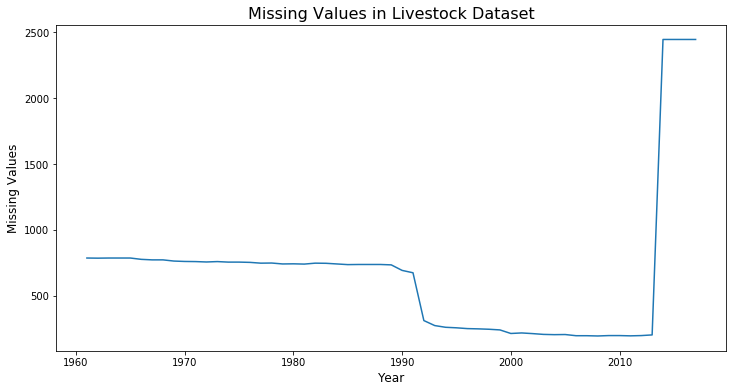

In [27]:
# Create series with missing values
missing_values = meat_data['Value'].isnull().groupby(meat_data['Year']).sum()

# Plot missing values with years on x-axis and missing values on y-axis
f = plt.figure(figsize = (12,6))
plt.plot(missing_values.index, missing_values.values)
plt.title('Missing Values in Livestock Dataset', fontsize = 16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Missing Values', fontsize=12)
plt.show()

In [28]:
# Remove all null values
meat_data = meat_data[meat_data['Value'].notnull()]

# Also remove all data after 2014 to have consistent data
meat_data = meat_data[meat_data['Year'] < 2014]

**Categorizing the Data**  
We would like to divide our dataset into areas, countries and continents for easier use in the future. Luckily, because of the way area codes are organized, this is easily done. Everything under 251 is countries, and everything above 5000 are areas. 

In [29]:
from scripts.helpers import *
print(split_fao_data.__doc__)

meat_countries, meat_area, meat_continents = split_fao_data(meat_data)


    Function that splits data into countries, areas and continents.
    params:
        df: fao-dataframe that includes area codes.
        
    returns:
        countries: dataframe with area-code < 500
        area: dataframe with only area-code > 500
        continents: dataframe with the 6 continents
    
    


**Saving the Data**  
To store the data for the future we save it in both CSV and pickles.  
All these CSV are however not pushed to git, so it has to be run locally. 

In [30]:
# Save dataframes to CSV
meat_countries.to_csv('./data/csv/meat_countries.csv')
meat_area.to_csv('./data/csv/meat_area.csv')
meat_continents.to_csv('./data/csv/meat_continents.csv')

In [31]:
# Save dataframes to pickles
meat_countries.to_pickle('./data/pickles/meat_countries.pkl')
meat_area.to_pickle('./data/pickles/meat_area.pkl')
meat_continents.to_pickle('./data/pickles/meat_continents.pkl')

#### Categorizing meats

In [61]:
meat_wanted = meat_continents[meat_continents.Item.str.contains('Meat, ')]
meat_wanted.Item.unique()

array(['Meat, ass', 'Meat, bird nes', 'Meat, buffalo', 'Meat, camel',
       'Meat, cattle', 'Meat, chicken', 'Meat, duck', 'Meat, game',
       'Meat, goat', 'Meat, goose and guinea fowl', 'Meat, horse',
       'Meat, nes', 'Meat, pig', 'Meat, rabbit', 'Meat, sheep',
       'Meat, turkey', 'Meat, Poultry', 'Meat, Total',
       'Meat, other camelids', 'Meat, other rodents', 'Meat, mule'],
      dtype=object)

We want to keep the three main meat categories separate (cattle, pig, chicken) and categorize the rest into the following:
- Equidae & Camelidae: ass, horse, camel, other camelids, mule, 
- Birds: bird nes, duck, goose & guinea fowl, turkey
- Bovidae: goat, sheep, buffalo
- Others: game, nes, rabbit + other rodents

In [62]:
main = ['Meat, pig', 'Meat, cattle', 'Meat, chicken', 'Meat, Total']
equidae_camelidae = ['Meat, ass', 'Meat, horse', 'Meat, camel', 'Meat, other camelids', 'Meat, mule']
bovidae = ['Meat, goat', 'Meat, sheep']
birds = ['Meat, bird nes', 'Meat, duck', 'Meat, goose and guinea fowl', 'Meat, turkey', 'Meat, buffalo']
others = ['Meat, rabbit', 'Meat, other rodents', 'Meat, game', 'Meat, nes']

meat_equidae_camelidae = meat_wanted[meat_wanted.Item.isin(equidae_camelidae)]
prod_equidae_camelidae = meat_equidae_camelidae.groupby(['Area','Element','Year','Unit']).agg({'Value':'sum'}).reset_index()
prod_equidae_camelidae['Item'] = 'Meat, equidaes and camelidaes'

meat_bovidae = meat_wanted[meat_wanted.Item.isin(bovidae)]
prod_bovidae = meat_bovidae.groupby(['Area','Element','Year','Unit']).agg({'Value':'sum'}).reset_index()
prod_bovidae['Item'] = 'Meat, bovidaes'

meat_birds = meat_wanted[meat_wanted.Item.isin(birds)]
prod_birds = meat_birds.groupby(['Area','Element','Year','Unit']).agg({'Value':'sum'}).reset_index()
prod_birds['Item'] = 'Meat, birds excl chicken'

meat_others = meat_wanted[meat_wanted.Item.isin(others)]
prod_others = meat_others.groupby(['Area','Element','Year','Unit']).agg({'Value':'sum'}).reset_index()
prod_others['Item'] = 'Meat, others'

meat_main = meat_wanted[meat_wanted.Item.isin(main)]
prod_main = meat_main.groupby(['Area','Element','Year','Unit','Item']).agg({'Value':'sum'}).reset_index()
prod_main = prod_main[['Area','Element','Year','Unit','Value','Item']]

meat_categorized = pd.concat([prod_equidae_camelidae, prod_bovidae, prod_birds, prod_others, prod_main], axis=0)
meat_categorized

,Area,Element,Year,Unit,Value,Item
0,Africa,Production,1961,tonnes,81898.0,"Meat, equidaes and camelidaes"
1,Africa,Production,1962,tonnes,84979.0,"Meat, equidaes and camelidaes"
2,Africa,Production,1963,tonnes,90274.0,"Meat, equidaes and camelidaes"
3,Africa,Production,1964,tonnes,93563.0,"Meat, equidaes and camelidaes"
4,Africa,Production,1965,tonnes,101465.0,"Meat, equidaes and camelidaes"
...,...,...,...,...,...,...
1267,South America,Production,2012,tonnes,5196654.0,"Meat, pig"
1268,South America,Production,2013,tonnes,40766701.0,"Meat, Total"
1269,South America,Production,2013,tonnes,15685487.0,"Meat, cattle"
1270,South America,Production,2013,tonnes,18734877.0,"Meat, chicken"


In [63]:
# Save dataframe to pickles
meat_categorized.to_pickle('./data/pickles/meat_categorized.pkl')